## 선행 작업
1. LJ Speech Dataset 다운로드
https://keithito.com/LJ-Speech-Dataset/
    
2. librosa 설치
https://librosa.github.io

In [1]:
import numpy as np

# librosa 라이브러리, wav, mp3등 오디오 파일을 numpy array로 불러오는데 필요. 내장 디코더는 없고, ffmpeg backend를 사용함.
import librosa

# librosa에서 spectrogram 등을 보여주는데 사용되는 모듈
import librosa.display

# librosa display는 matplotlib를 이용하는데 이를 같이 import해서 보여주는데 있어 세부적인 사항들을 조정할 수 있음.
import matplotlib.pyplot as plt


## wav 파일 목록 얻기

In [2]:
import os
from os import listdir
from os.path import isfile, join

data_dir = '/home/scpark/hard/datasets/LJSpeech-1.1/wavs'

# 해당 디렉토리에 있는 파일 중 이름에 wav가 들어가 있는 모든 파일의 경로를 리스트에 담는다.
data_files = [join(data_dir, f) for f in listdir(data_dir) if isfile(join(data_dir, f)) if 'wav' in f]
data_files.sort()

print('wave files : ', len(data_files))
print(data_files[0])


wave files :  13100
/home/scpark/hard/datasets/LJSpeech-1.1/wavs/LJ001-0001.wav


## 파일 로드

wav : [-0.00027466  0.          0.         ... -0.00088501 -0.00097656
 -0.00109863]
sample rate : 22050 length : 41885
duration : 1.899546485260771 seconds


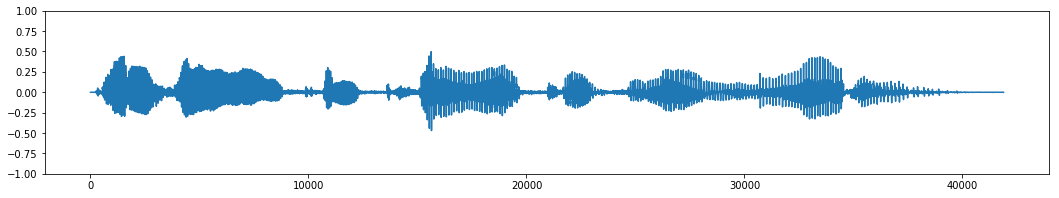

In [3]:
'''
오디오 파일 로드
https://librosa.github.io/librosa/generated/librosa.core.load.html
'''
# return values
# wav : 오디오 신호
# sr : sample rate, default=22050
wav, sr = librosa.core.load(data_files[1])
print('wav :', wav)

# sample rate, 총 샘플 길이
print('sample rate :', sr, 'length :', len(wav))

# 총 시간 = length of wave / sample rate
print('duration :', len(wav) / sr, 'seconds')

# matplotlib를 이용해서 파형 보여주기 
plt.figure(figsize=[18, 3])
plt.plot(wav)
plt.ylim([-1, 1])
plt.show()

# wav 들어보기
import IPython.display as ipd
ipd.Audio(wav, rate=sr)


### 연습1 : 오디오 파일을 sample rate 44100으로 읽어 파형을 보여주고, sample rate 22050으로 들어봅시다.

In [4]:
# sample rate 44100으로 읽어오기

# 파형 보여주기

# sample rate 22050으로 재생하기


## 파형 자세히 보기

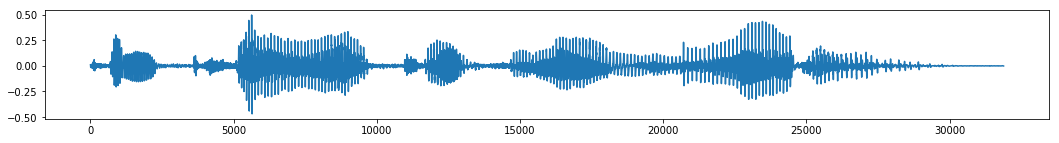

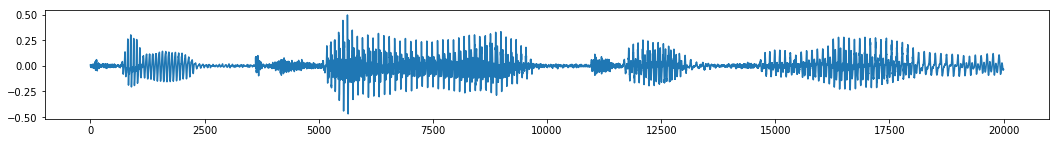

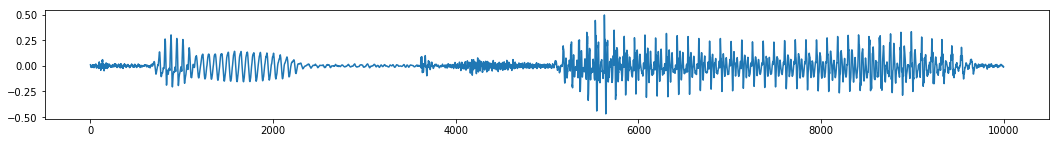

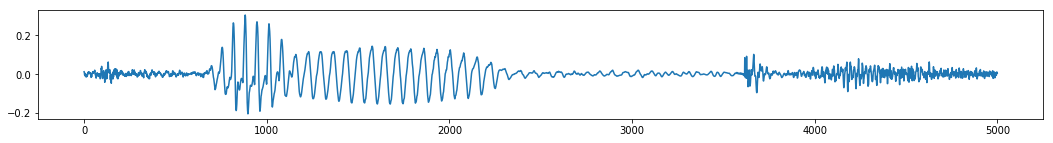

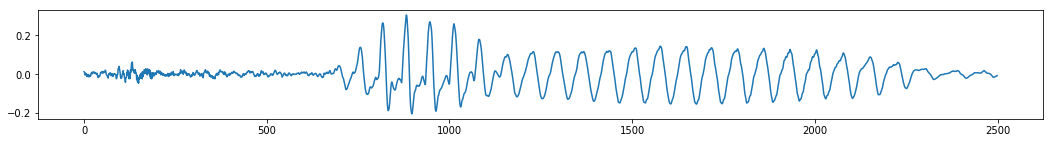

In [5]:
# wav 파형 10000-50000 샘플 보기
plt.figure(figsize=[18, 2])
plt.plot(wav[10000:50000])
plt.show()

# wav 파형 10000-30000 샘플 보기
plt.figure(figsize=[18, 2])
plt.plot(wav[10000:30000])
plt.show()

# wav 파형 10000-20000 샘플 보기
plt.figure(figsize=[18, 2])
plt.plot(wav[10000:20000])
plt.show()

# wav 파형 10000-15000 샘플 보기
plt.figure(figsize=[18, 2])
plt.plot(wav[10000:15000])
plt.show()

# wav 파형 10000-12500 샘플 보기
plt.figure(figsize=[18, 2])
plt.plot(wav[10000:12500])
plt.show()


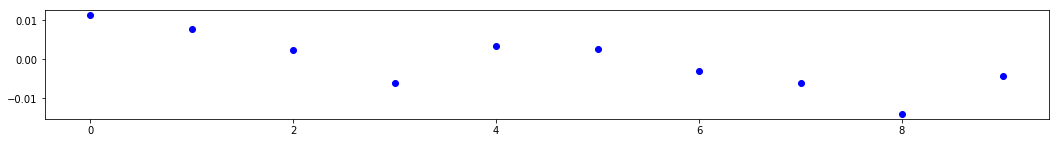

In [6]:
# wav 파형 10000-12500 샘플 보기
plt.figure(figsize=[18, 2])
plt.plot(wav[10000:10010], 'bo')
plt.show()


## Normalizing 

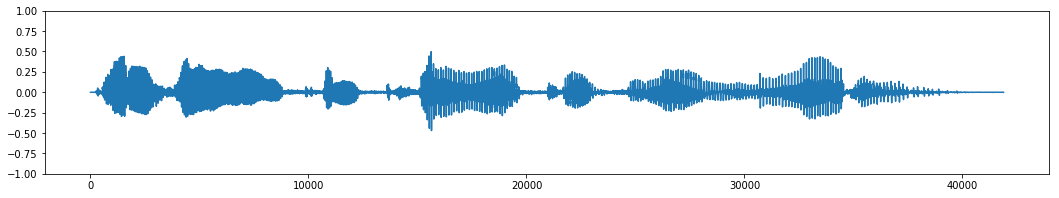

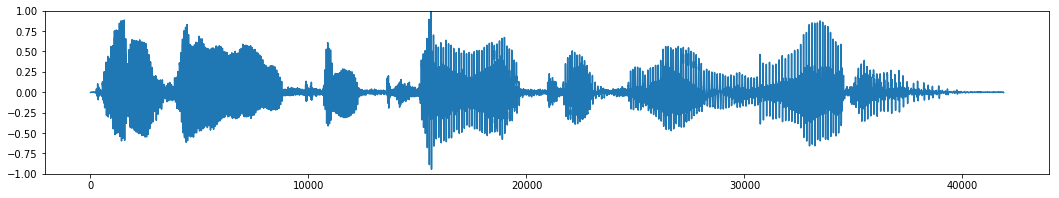

In [7]:
normed_wav = wav / max(wav)

plt.figure(figsize=[18, 3])
plt.plot(wav)
plt.ylim([-1, 1])
plt.show()

plt.figure(figsize=[18, 3])
plt.plot(normed_wav)
plt.ylim([-1, 1])
plt.show()


### 연습2 : 파형을 2배, 3배로 키우고 들어 봅시다. 또, 0.5 0.25배로 줄이고 들어 봅시다.

In [8]:
# 파형을 2배로 키우기

# 파형을 3배로 키우기

# 들어보기

# 파형을 0.5배로 줄이기

# 파형을 0.25배로 줄이기

# 들어보기


## Quantization 8-bit


quantized values : [-29 -22 -21 -22 -34 -32 -32 -21 -11 -24 -23   7  15  23  20 -11  17  44
  49  60  60  62  73  63  36  35  41  47  61  48  29  16   1 -10  -6 -14
 -25 -21 -23 -26 -34 -50 -57 -47 -43 -43 -38 -36 -22 -10 -18 -19 -13  -8
  11  20  20  29  32  33  31  23  19  26  27  25  18   7  -1  -5 -12 -20
 -24 -26 -27 -28 -33 -42 -44 -46 -43 -40 -41 -43 -39 -47 -39 -40 -28 -28
   8  36  13  38 -14  -6  45  55  88  96]


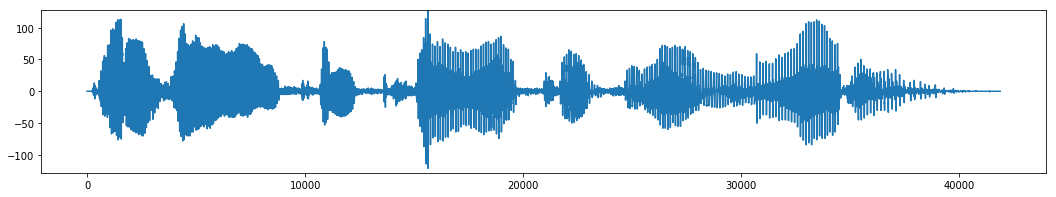

In [9]:
Bit = 8
max_value = 2 ** (Bit-1) # 128

# max_value를 곱함
quantized_8_wav = normed_wav * max_value
# integer로 반올림
quantized_8_wav = np.round(quantized_8_wav).astype(int)
# 범위 설정
quantized_8_wav = np.clip(quantized_8_wav, -max_value, max_value-1)

print('quantized values :', quantized_8_wav[1000:1100])

plt.figure(figsize=[18, 3])
plt.plot(quantized_8_wav)
plt.ylim([-max_value, max_value])
plt.show()

# wav 들어보기
import IPython.display as ipd
ipd.Audio(quantized_8_wav, rate=sr)


### 연습3 : 16-bit quantization을 해보고, 소리를 들어봅시다.


In [10]:
# normed_wav를 16-bit quantize해서 quantized_wav구하기

# quantized_wav 보여주기

# quantized_wav 들어보기


## mu-law encoding

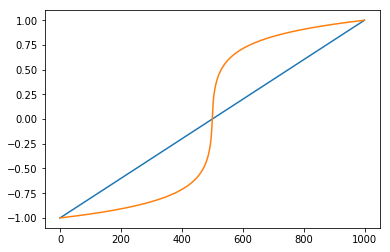

In [33]:
def mu_law(x, mu=255):
    # reference : https://en.wikipedia.org/wiki/Μ-law_algorithm
    return np.sign(x) * np.log(1 + mu * np.abs(x)) / np.log(1 + mu)
    
x = np.linspace(-1, 1, 1000)
x_mu = mu_law(x)

plt.figure(figsize=[6, 4])
plt.plot(x)
plt.plot(x_mu)
plt.show()

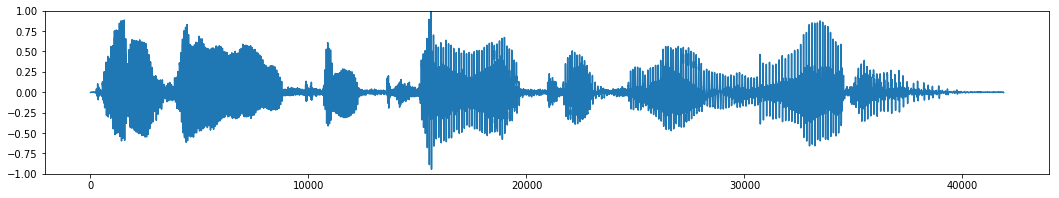

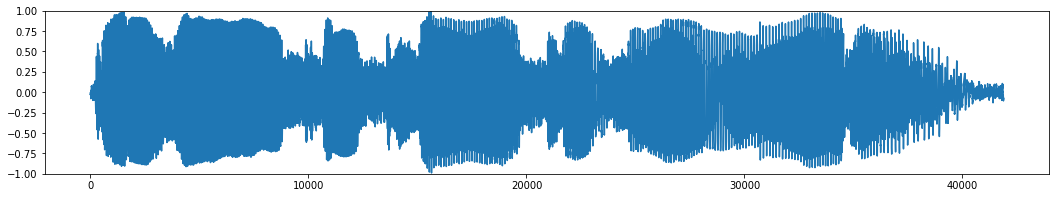

In [12]:
wav_mulaw = mu_law(normed_wav)

plt.figure(figsize=[18, 3])
plt.plot(normed_wav)
plt.ylim([-1, 1])
plt.show()

plt.figure(figsize=[18, 3])
plt.plot(wav_mulaw)
plt.ylim([-1, 1])
plt.show()

## mu-law 8bit quantization

quantized values : [ -94  -88  -87  -88  -97  -97  -97  -87  -71  -90  -88   61   79   89
   86  -72   82  103  106  111  111  111  115  112   99   99  102  105
  111  105   94   81   30  -70  -60  -78  -91  -87  -89  -91  -98 -106
 -110 -105 -103 -103 -100  -99  -88  -70  -83  -85  -76  -65   72   85
   85   94   96   97   95   89   85   91   92   90   83   61  -20  -54
  -75  -85  -90  -92  -92  -93  -97 -102 -103 -105 -103 -101 -102 -103
 -101 -105 -101 -102  -93  -94   66   99   76  100  -78  -59  104  109
  119  121]


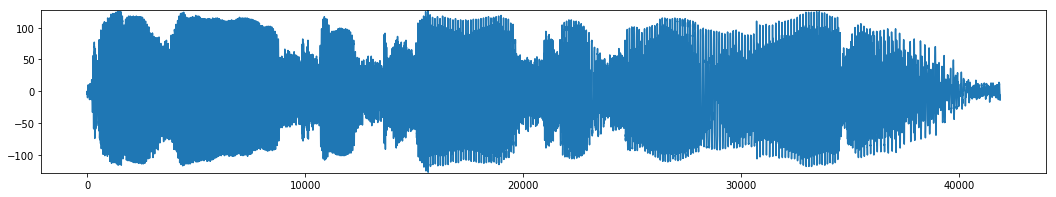

In [13]:
Bit = 8
max_value = 2 ** (Bit-1) # 128

# max_value를 곱함
quantized_8mu_wav = wav_mulaw * max_value
# integer로 반올림
quantized_8mu_wav = np.round(quantized_8mu_wav).astype(int)
# 범위 설정
quantized_8mu_wav = np.clip(quantized_8mu_wav, -max_value, max_value-1)

print('quantized values :', quantized_8mu_wav[1000:1100])

plt.figure(figsize=[18, 3])
plt.plot(quantized_8mu_wav)
plt.ylim([-max_value, max_value])
plt.show()

## mu-law encoded wav reconstruction 

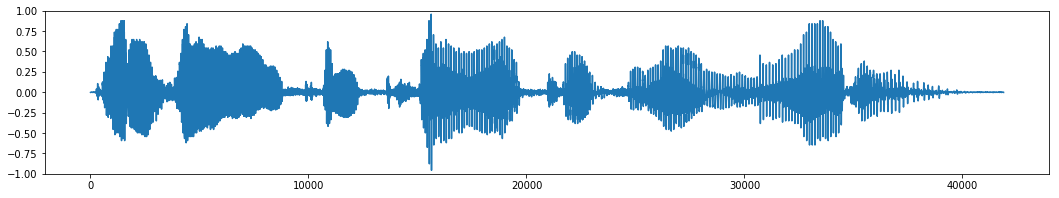

In [14]:
def inverse_mu_law(y, mu=255):
    # reference : https://en.wikipedia.org/wiki/Μ-law_algorithm
    return np.sign(y) * (1/mu) * ((1+mu) ** np.abs(y) - 1)

dequantized_wav = quantized_8mu_wav / max_value
reconstructed_wav = inverse_mu_law(dequantized_wav)

plt.figure(figsize=[18, 3])
plt.plot(reconstructed_wav)
plt.ylim([-1, 1])
plt.show()

# reconstructed_wav 들어보기, wav와 quantized_8_wav reconstructed_wav 비교해보기
import IPython.display as ipd
ipd.Audio(reconstructed_wav, rate=sr)


### 연습4: normed_wav를 A-law로 변환하고, 8-bit quantization해봅시다.

In [23]:
'''
A-law 변환
'''
def A_law(x, A=87.6):
    # reference : https://en.wikipedia.org/wiki/A-law_algorithm
    # hint : np.where()을 이용하면 element 값에 따라 조건을 나누어 식을 만들 수 있다.
    return x

wav_Alaw = A_law(normed_wav)

'''
8-bit Quantization
'''
quantized_8A_wav = None


### 연습5: 8-bit quantization한 것을 다시 dequantization하고, A-law의 역변환을 한 뒤 소리를 들어봅시다.

In [ ]:
def inverse_A_law(y, A=87.6):
    # reference : https://en.wikipedia.org/wiki/A-law_algorithm
    return y

'''
Dequantization
'''
dequantized_wav = None

'''
A-law inverse transform
'''
reconstructed_wav = None

## Simple RNN prediction model

### Main model

In [76]:
def simple_rnn_model(X, state, name='simple_rnn_model', channels=256, embedding_dim=256, hidden_dim=256):
    with tf.variable_scope(name):
        '''
        For Training
        '''
        # X : [Batch, Length]
        
        # [channels, embedding_dim]
        embedding_table = tf.get_variable('embedding_table', [channels, embedding_dim])
        # [Batch, Length, embedding_dim]
        X_embedded = tf.gather(embedding_table, X)
        
        cell = tf.nn.rnn_cell.GRUCell(hidden_dim)
        # outputs : [Batch, Length, hidden_dim]
        outputs, _ = tf.nn.dynamic_rnn(cell=cell, inputs=X_embedded, dtype=tf.float32)
        
        logits = tf.nn.relu(tf.layers.dense(outputs, channels, name='dense1'))
        logits = tf.layers.dense(logits, channels, name='dense2')
        
        '''
        For Inference
        '''
        output, new_state = cell(inputs=X_embedded[:, 0], state=state)
        print(new_state)
        
        logit = tf.nn.relu(tf.layers.dense(output, channels, name='dense1', reuse=True))
        logit = tf.layers.dense(logit, channels, name='dense2', reuse=True)
        
        return logits, logit, new_state

### Graph Draw

In [84]:
import tensorflow as tf

'''
Hyperparameters
'''
Batch = None
Length = None
Channels = 256

SampleRate = 8000

'''
Graph Draw
'''
tf.reset_default_graph()

# [Batch, Length]
X = tf.placeholder(tf.int32, [Batch, Length])
state = tf.placeholder(tf.float32, [Batch, 256])

# [Batch, Length, Channels]
logits, logit, new_state = simple_rnn_model(X, state)

'''
Inference
'''
sample = tf.random.categorical(logits=logit, num_samples=1)
print(sample.shape)

# [Batch, Length]
cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=X[:, 1:], logits=logits[:, :-1])
loss = tf.reduce_mean(cross_entropy)

'''
Train
'''
global_step = tf.Variable(0, name='global_step')
learning_rate = tf.Variable(1e-3, name='learning_rate')
train_step = tf.train.AdamOptimizer(learning_rate).minimize(loss, global_step)

'''
Session Open
'''
sess = tf.Session()
sess.run(tf.global_variables_initializer())

print('Done.')

Tensor("simple_rnn_model/rnn/while/gru_cell/add_1:0", shape=(?, 256), dtype=float32)
(?, 1)
Done.


### data preprocessing

(8, 32000)


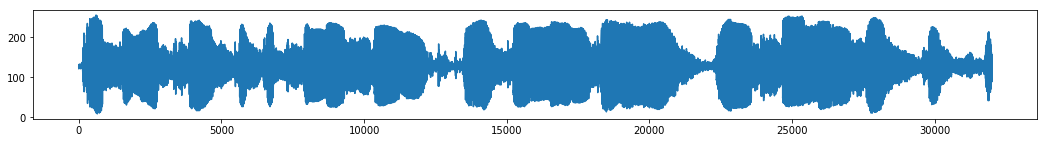

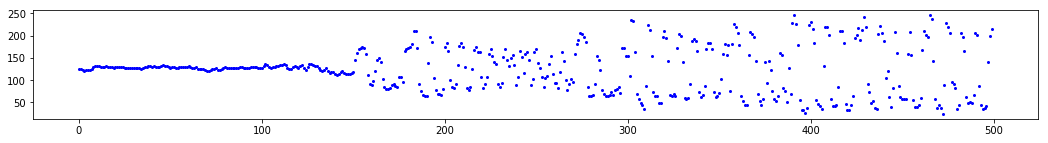

In [85]:
'''
[batch, length] shape을 갖는 wave 데이터를 준비한다.
sample_rate와 quantization에 사용될 mu값을 지정할 수 있다.
'''
def get_data(batch=8, length=8000 * 4, sample_rate=8000, mu=255):
    
    waves = None
    '''
    batch * length 길이의 데이터를 얻을 때 까지 파일에서 로드
    '''
    while(True):
        index = np.random.randint(0, len(data_files))
        wave, _ = librosa.core.load(data_files[index], sr=sample_rate)
        
        # normalization
        wave /= max(wave)
        
        if waves is None:
            waves = wave
        else:
            waves = np.concatenate([waves, wave], axis=0)
            
        if len(waves) > batch * length:
            break

    '''
    [batch, length] shape으로 다듬기
    '''
    waves = waves[:batch * length]
    waves = np.reshape(waves, [batch, length])
    
    '''
    mu-law encoding
    '''
    def mu_law(x, mu=255):
        # reference : https://en.wikipedia.org/wiki/Μ-law_algorithm
        return np.sign(x) * np.log(1 + mu * np.abs(x)) / np.log(1 + mu)
    
    waves_mu = mu_law(waves)    
    
    '''
    8-bit Quantization
    '''
    # max_value를 곱함
    quantized_8_wav = waves_mu * 128
    # integer로 반올림
    quantized_8_wav = np.round(quantized_8_wav).astype(int)
    # 범위 설정
    quantized_8_wav = np.clip(quantized_8_wav, -128, 127)
    quantized_8_wav += 128

    return quantized_8_wav

'''
preprocessing한 데이터 보기
'''
data = get_data()
print(data.shape)

plt.figure(figsize=[18, 2])
plt.plot(data[0])
plt.show()

plt.figure(figsize=[18, 2])
plt.plot(data[0, :500], 'bo', markersize=2)
plt.show()

## Training Loop

In [ ]:
from IPython.display import clear_output
from tqdm import tqdm_notebook as tqdm

while(True):
    for _ in range(100):
        data = get_data(batch=32, length=100)
        print('data shape :', data.shape)
        _, _loss = sess.run([train_step, loss], feed_dict={X: data})
        print('loss :', _loss)
            
    clear_output()
    

## Sampling

(1, 101)


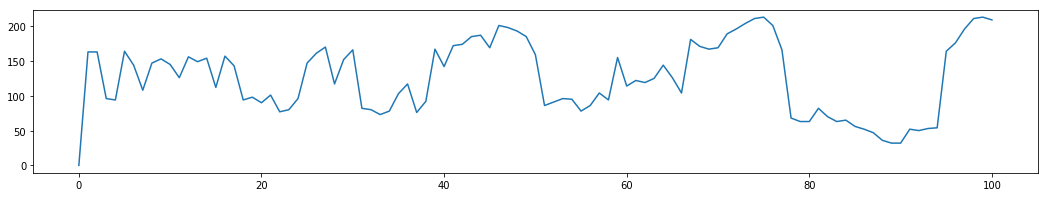

In [93]:
_data = _sample = np.zeros([1, 1])
_state = np.zeros([1, 256])

for _ in range(100):
    _sample, _state = sess.run([sample, new_state], feed_dict={X: _sample, state: _state})
    _data = np.concatenate([_data, _sample], axis=1)
print(_data.shape)

plt.figure(figsize=[18, 3])
plt.plot(_data[0])
plt.show()